<a href="https://colab.research.google.com/github/SbElolen/SongLyricsAnalysis/blob/main/song_lyrics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving Lil_Wayne.txt to Lil_Wayne.txt


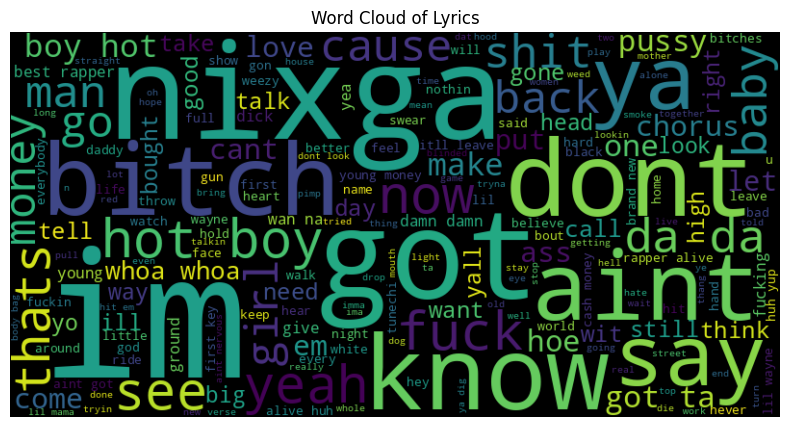

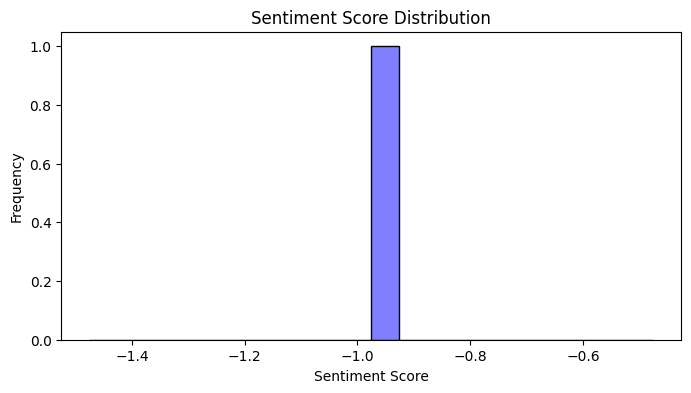

,Filename,Lyrics,Sentiment,Sentiment_Label,Tokens
0,Lil_Wayne.txt,﻿They call me Mr Carter I kissed the daughter\...,-0.9754,Negative,"[﻿they, call, me, mr, carter, i, kissed, the, ..."


In [9]:
from google.colab import files
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary nltk resources
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("vader_lexicon")

# Upload files manually
uploaded = files.upload()  # This will prompt you to upload files, Txt files are appreciated

# Read uploaded text files
lyrics_data = {}
for filename in uploaded.keys():
    with open(filename, "r", encoding="utf-8") as file: # This encodes it into text too, but to avoid unnecessary wahala
        lyrics_data[filename] = file.read()

# Convert to DataFrame
df = pd.DataFrame(list(lyrics_data.items()), columns=["Filename", "Lyrics"])

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["Sentiment"] = df["Lyrics"].apply(lambda text: sia.polarity_scores(text)["compound"])

# Categorize sentiment "This is how you know which song screams positivity or not"
df["Sentiment_Label"] = df["Sentiment"].apply(lambda score: "Positive" if score > 0.05 else ("Negative" if score < -0.05 else "Neutral"))

# Tokenize and clean lyrics "Make sure the punkt_tab has been infused properly into the code, cus I had issues with it too"
df["Tokens"] = df["Lyrics"].apply(lambda text: nltk.word_tokenize(text.lower()))

# Flatten list of all words
all_words = [word for tokens in df["Tokens"] for word in tokens]

# Count word frequency
word_counts = Counter(all_words)

# Create a word cloud for it
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(all_words))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Lyrics")
plt.show()

# Sentiment distribution plot
plt.figure(figsize=(8, 4))
sns.histplot(df["Sentiment"], bins=20, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Displays the first few rows
df.head()
